In [1]:
import pandas as pd

file_path = 'apple.csv'
apple_stock_data = pd.read_csv(file_path)
apple_stock_data.head()

,Date,High,Low,Mid
0,2022-07-01,139.039993,135.660004,137.349998
1,2022-07-05,141.610001,136.929993,139.269997
2,2022-07-06,144.119995,141.080002,142.599998
3,2022-07-07,146.550003,143.279999,144.915001
4,2022-07-08,147.550003,145.000000,146.275002


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

metrics = {
    'High': {},
    'Low': {},
    'Mid': {}
}

X = np.arange(len(apple_stock_data)).reshape(-1, 1)
y_high = apple_stock_data['High'].values
y_low = apple_stock_data['Low'].values
y_mid = apple_stock_data['Mid'].values
X_train, X_test, y_high_train, y_high_test = train_test_split(X, y_high, test_size=0.2, shuffle=False)
_, _, y_low_train, y_low_test = train_test_split(X, y_low, test_size=0.2, shuffle=False)
_, _, y_mid_train, y_mid_test = train_test_split(X, y_mid, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
lr = LinearRegression()

In [3]:
def calculate_metrics(X_train, y_train, X_test, y_test):
    lr.fit(X_train, y_train)
    y_pred_test = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Calculate metrics for High, Low, and Mid
metrics_high = calculate_metrics(X_train, y_high_train, X_test, y_high_test)
metrics_low = calculate_metrics(X_train, y_low_train, X_test, y_low_test)
metrics_mid = calculate_metrics(X_train, y_mid_train, X_test, y_mid_test)

metrics_dict = {
    'High': {
        'MSE': metrics_high[0],
        'MAE': metrics_high[1],
        'RMSE': metrics_high[2]
    },
    'Low': {
        'MSE': metrics_low[0],
        'MAE': metrics_low[1],
        'RMSE': metrics_low[2]
    },
    'Mid': {
        'MSE': metrics_mid[0],
        'MAE': metrics_mid[1],
        'RMSE': metrics_mid[2]
    }
}

metrics_dict

{'High': {'MSE': 898.5874515524617,
  'MAE': 28.914001636483025,
  'RMSE': 29.976448281150017},
 'Low': {'MSE': 928.8333549292192,
  'MAE': 29.480987743526157,
  'RMSE': 30.476767461940895},
 'Mid': {'MSE': 913.4276421297244,
  'MAE': 29.19749469000459,
  'RMSE': 30.222965475441427}}

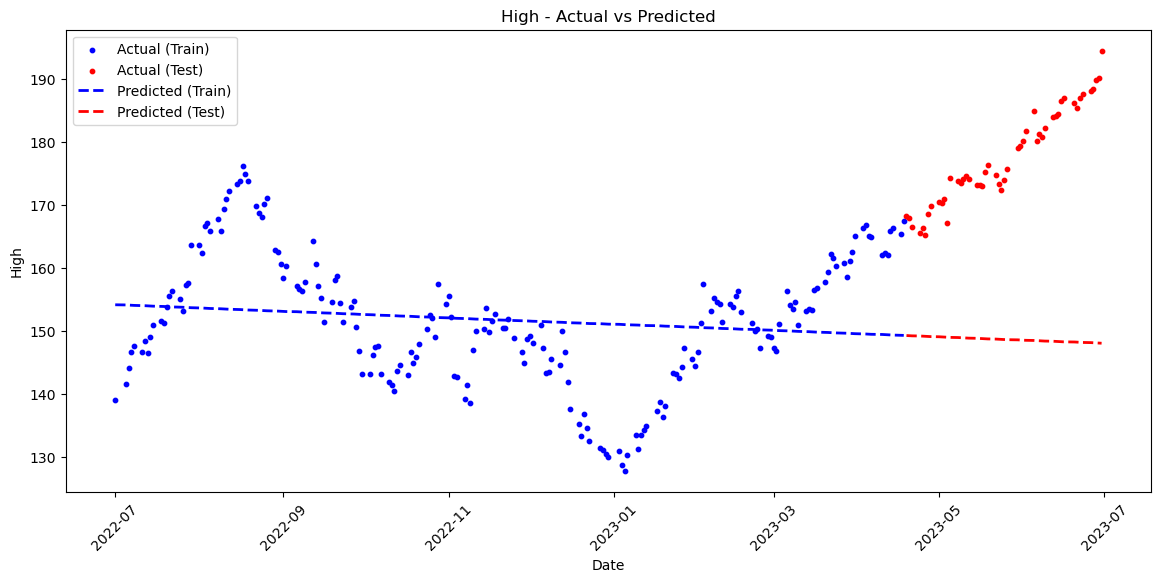

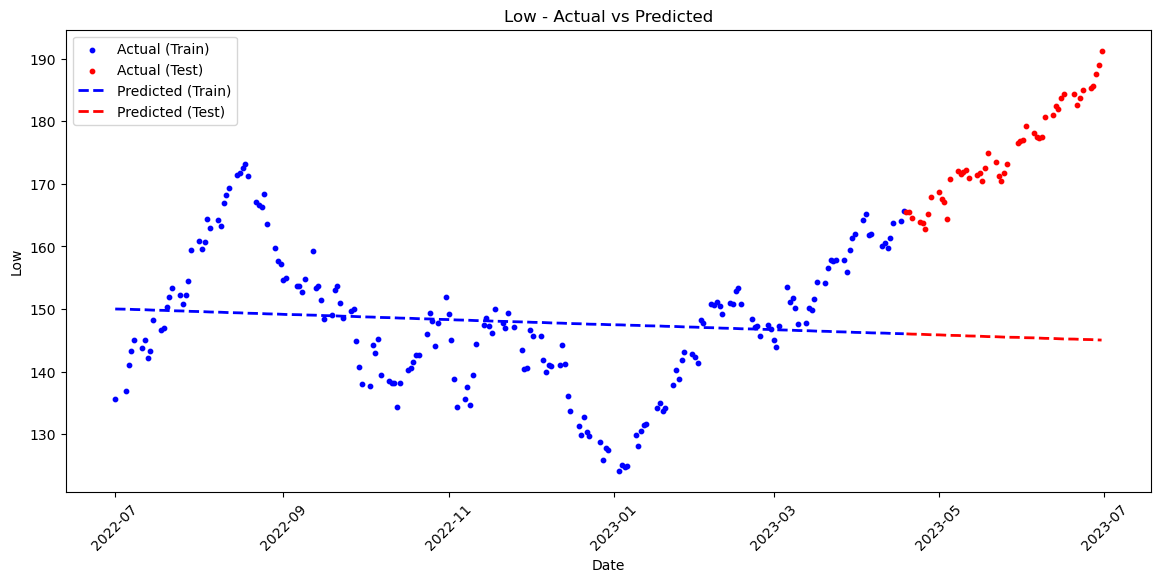

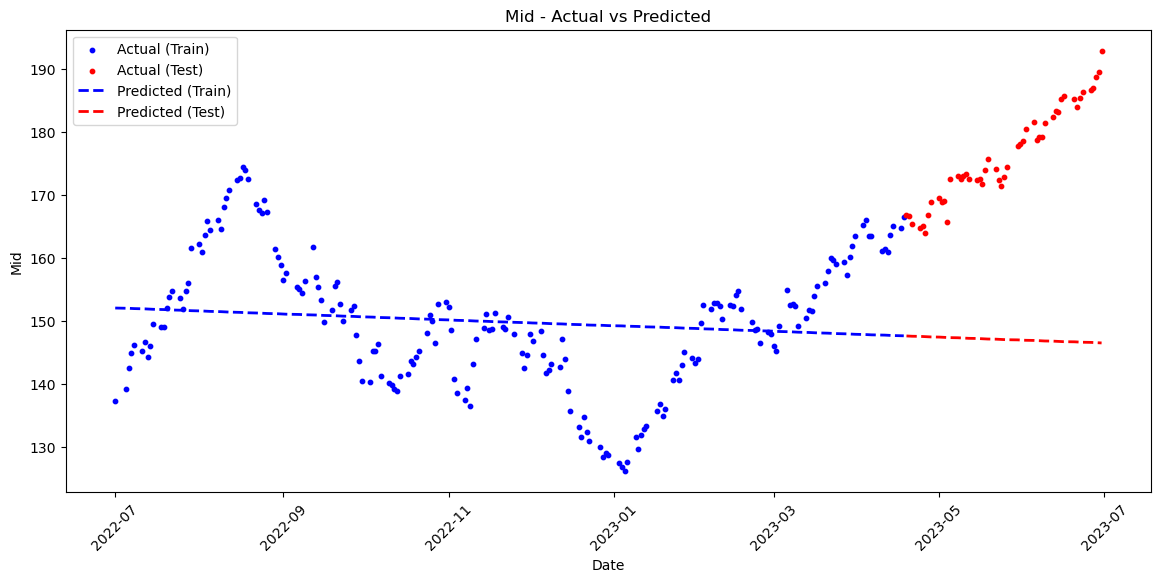

In [4]:
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])
date_train, date_test = train_test_split(apple_stock_data['Date'], test_size=0.2, shuffle=False)
def perform_linear_regression_and_plot_with_date(date_train, date_test, y_train, y_test, label):
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    plt.figure(figsize=(14, 6))
    plt.scatter(date_train, y_train, color='blue', label='Actual (Train)', s=10)
    plt.scatter(date_test, y_test, color='red', label='Actual (Test)', s=10)
    plt.plot(date_train, y_pred_train, color='blue', linewidth=2, linestyle='--', label='Predicted (Train)')
    plt.plot(date_test, y_pred_test, color='red', linewidth=2, linestyle='--', label='Predicted (Test)')
    plt.title(f'{label} - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel(label)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
perform_linear_regression_and_plot_with_date(date_train, date_test, y_high_train, y_high_test, 'High')
perform_linear_regression_and_plot_with_date(date_train, date_test, y_low_train, y_low_test, 'Low')
perform_linear_regression_and_plot_with_date(date_train, date_test, y_mid_train, y_mid_test, 'Mid')